In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Selecting features by using the correlation matrix and elimating columns based on the results and understanding

<Axes: >

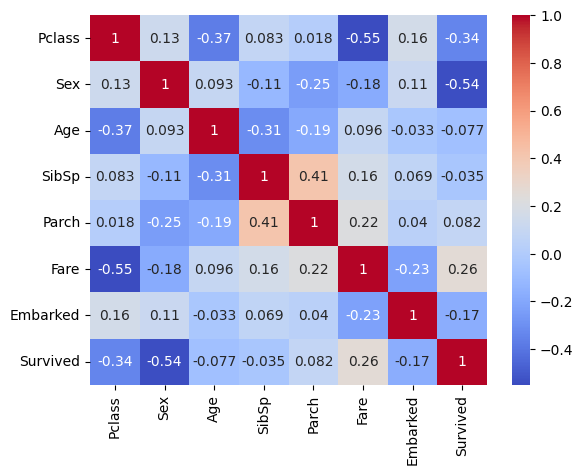

In [2]:
file_path='C:/AAKASH/MS NOTES/kaggle/TITANIC/train.csv'
raw_trainfile= pd.read_csv(file_path,sep=',')


#To compute correlation
raw_trainfile = raw_trainfile[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

#C = Cherbourg, Q = Queenstown, S = Southampton
Embarked_mapping = {'C': 1, 'Q': 2, 'S':3}
raw_trainfile['Embarked'] = raw_trainfile['Embarked'].map(Embarked_mapping)

gender_mapping = {'male': 1, 'female': 0}
raw_trainfile['Sex'] = raw_trainfile['Sex'].map(gender_mapping)

corr_matrix=raw_trainfile[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')



Finding the missing values in train data

In [3]:
miss_val_train=raw_trainfile.isnull().sum()
print("BEFORE FILLING:\n"+str(miss_val_train))

raw_trainfile['Age']=raw_trainfile['Age'].fillna(raw_trainfile['Age'].mean())
raw_trainfile['Embarked']=raw_trainfile['Embarked'].fillna(raw_trainfile['Embarked'].mode()[0])

miss_val_train=raw_trainfile.isnull().sum()
print("AFTER FILLING:\n"+str(miss_val_train))

BEFORE FILLING:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
AFTER FILLING:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


We are using pandas data frame to import the file. 
Here in the pandas data frame (df), we cannot use numpy (np) operations directly...we need to convert from df to a numpy array.
By importing using pd we dont need to skip the header and index column as after converting to np the header,index is eliminated.




For X_train,We have dropped the 2nd column of targets along with some others using pd and then convert the same into np
similarly for Y_train, we have selected only the 2nd column using pd and converted it into np

Now to implement logistic regression for classifiaction as neural network we need to flatten the data
It is done by taking the transpose of the data matrix

The following block is dedicated to training set

In [4]:
drop_col=['PassengerId','Survived','SibSp','Name','Ticket','Fare','Cabin']

#To calc input matrix
X_train =np.array(raw_trainfile.drop(columns=drop_col))
print("X_train shape:"+str(X_train.shape))
print("X_train:\n"+str(X_train[:5]))

#To calc target matrix
Y_train=np.array(raw_trainfile['Survived'])
Y_train=Y_train.reshape(-1,1)
print("Y_train shape:"+str(Y_train.shape))
#print("Y_train:\n"+str(Y_train[:2]))

#To calc flattened input matrix
X_train_flat=X_train.T
print("X_train flattened shape:"+str(X_train_flat.shape))
#print("X_train flattened:\n"+str(X_train_flat[:2]))

#To calc flattened target matrix
Y_train_flat=Y_train.T
print("Y_train flattened shape"+str(Y_train_flat.shape))
#print("Y_train flattened"+str(Y_train_flat[:2]))

#To calculate no. of instance,m
m=X_train.shape[0]
print("Training instances:"+str(m))
#to calculate no. of feature,n
n=X_train.shape[1]
print("Training features:"+str(n))



X_train shape:(891, 5)
X_train:
[[ 3.  1. 22.  0.  3.]
 [ 1.  0. 38.  0.  1.]
 [ 3.  0. 26.  0.  3.]
 [ 1.  0. 35.  0.  3.]
 [ 3.  1. 35.  0.  3.]]
Y_train shape:(891, 1)
X_train flattened shape:(5, 891)
Y_train flattened shape(1, 891)
Training instances:891
Training features:5


Repeat the above computations for the test set

In [5]:
file_path='C:/AAKASH/MS NOTES/kaggle/TITANIC/test.csv'
raw_testfile= pd.read_csv(file_path,sep=',')
#print("raw test file:\n"+str(raw_testfile[:2]))

#C = Cherbourg, Q = Queenstown, S = Southampton
Embarked_mapping = {'C': 1, 'Q': 2, 'S':3}
raw_testfile['Embarked'] = raw_testfile['Embarked'].map(Embarked_mapping)

gender_mapping = {'male': 1, 'female': 0}
raw_testfile['Sex'] = raw_testfile['Sex'].map(gender_mapping)


In [6]:
miss_val_test=raw_testfile.isnull().sum()
print("BEFORE FILLING:\n"+str(miss_val_test))

raw_testfile['Age']=raw_testfile['Age'].fillna(raw_testfile['Age'].mean())
raw_testfile['Embarked']=raw_testfile['Embarked'].fillna(raw_testfile['Embarked'].mode()[0])

miss_val_test=raw_testfile.isnull().sum()
print("AFTER FILLING:\n"+str(miss_val_test))

BEFORE FILLING:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
AFTER FILLING:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:

drop_col=['PassengerId','SibSp','Name','Ticket','Fare','Cabin']

X_test  =np.array(raw_testfile.drop(columns=drop_col))
print("X_test shape:"+str(X_test.shape))
print("X_test:\n"+str(X_test[:5]))

#Since this project is from kaggle competetion we do not have acces to the tagerts or labels of the test set

#To calc flattened input matrix
X_test_flat=X_test.T
print("X_test flattened shape:"+str(X_test_flat.shape))
#print("X_test flattened:\n"+str(X_test_flat[:2]))


#To calculate no. of instance,m
m_test=X_test.shape[0]
print("Test instances:"+str(m_test))
#to calculate no. of feature,n
n_test=X_test.shape[1]
print("Test features:"+str(n_test))



X_test shape:(418, 5)
X_test:
[[ 3.   1.  34.5  0.   2. ]
 [ 3.   0.  47.   0.   3. ]
 [ 2.   1.  62.   0.   2. ]
 [ 3.   1.  27.   0.   3. ]
 [ 3.   0.  22.   1.   3. ]]
X_test flattened shape:(5, 418)
Test instances:418
Test features:5


Implementing linear function z

In [8]:
def linear(w,b,X):
    
    Z=np.dot(w.T,X)+b
    return Z

Since we are using Logistic regression as a nueral network setting, we will define the sigmoid function as follows

In [9]:
def sigmoid(Z):
    #z is the scalar array
    s=1/(1+np.exp(-Z))
    return s

Initialising the parameters w and b as zero vectors

In [10]:
def initialise_parameters(weight_dim):
    #weight_dim is the no. of features 
    w = np.random.randn(weight_dim, 1) * np.sqrt(1 / weight_dim)
    #w=w.reshape((weight_dim,1))
    b=0
    
    return w,b

Implementing forward and backpropagration

In [11]:
def for_prop(w,b,X,Y):
    #m is the no. of training instance
    m=X.shape[1]
    Z=linear(w,b,X)
    A=sigmoid(Z)
    delta=1e-20
    cost=np.sum((-(Y*np.log(A)))+(-((1-Y)*np.log(1-A+delta))))/m
    return cost
    
    

In [12]:
def back_prop(w,b,X,Y):
    #m is the no. of training instance
    m=X.shape[1]
    Z=linear(w,b,X)
    A=sigmoid(Z)
    dw=1/m*(np.dot(X,(A-Y).T))
    db=1/m*np.sum(A-Y)
    
    #grads={"dw":dw,
           #"db":db}

    return dw,db

Def a function for optimisation of these parameters

In [13]:
def optimise(w,b,X,Y,iterations,alpha):
    J_array=[]
    w_array=[]
    b_array=[]
    J_array.clear()
    w_array.clear()
    b_array.clear()
    min_cost=0
    for i in range(iterations):
        cost=for_prop(w,b,X,Y)
        dw,db=back_prop(w,b,X,Y)
        w=w-(alpha*dw)
        w_array.append(w)
        b=b-(alpha*db)
        b_array.append(b)
        J_array.append(cost)
        if i %2500 == 0:
            print("iteration" + str(i)+ "  : cost" + str(J_array[i])+"     :w"+str(w_array[i]) +"   :b"+str(b_array[i]))
    plt.plot(J_array)
    min_cost=min(J_array)
    print("min cost",min_cost)
    for i in range(iterations):
      if J_array[i]==min_cost:
           w=w_array[i]
           b=b_array[i]
           #print("Final w:"+str(w))
           #print("Final b:"+str(b))
    return w,b,J_array,w_array,b_array


Function to predict the outcome

In [14]:
def predict(w,b,X):
    #m is the no. of training instance
    m=X.shape[1]
    # initialising the pred matrix with zero
    #Y_pred=np.zeros((1,m))
    Z=linear(w,b,X)
    A=sigmoid(Z)    #shape of (1,m)
    Y_pred= (A>=0.5) * 1.0
    return Y_pred

Now merging everything into 1 final function named model to implement the logistic regression

In [15]:
def main_model(X_train_flat,X_test_flat,Y_train_flat,iterations,alpha):
    #initialise parameters
    weight_dim=X_train_flat.shape[0]
    w,b=initialise_parameters(weight_dim)
    w,b,J_array,w_array,b_array=optimise(w,b,X_train_flat,Y_train_flat,iterations,alpha)
    Y_pred_train=predict(w,b,X_train_flat)
    Y_pred_test=predict(w,b,X_test_flat)
    
    Final_pred={"w":w,
                "b":b,
                "J_array":J_array,
                "w_array":w_array,
                "b_array":b_array,
                "Y_pred_train":Y_pred_train,
                "Y_pred_test":Y_pred_test}

    return Final_pred

Finally , writing a single line code to train the model

iteration0  : cost4.8300266055273795     :w[[ 0.33741761]
 [ 0.3701556 ]
 [ 0.09777604]
 [-0.19650068]
 [ 1.20300892]]   :b-0.000613080945673605
iteration2500  : cost0.6627601982890737     :w[[-0.38661128]
 [-0.04599345]
 [-0.02212314]
 [-0.16377319]
 [ 0.4992513 ]]   :b-0.12390748685555387
iteration5000  : cost0.6104598919809954     :w[[-0.4889175 ]
 [-0.30968861]
 [-0.00135765]
 [-0.05207365]
 [ 0.33912191]]   :b-0.08278587987725397
iteration7500  : cost0.5865546847840982     :w[[-0.48332017]
 [-0.52036801]
 [ 0.00292348]
 [ 0.03519437]
 [ 0.28929317]]   :b-0.013577074181690818
iteration10000  : cost0.5697305115774752     :w[[-0.46603291]
 [-0.70105011]
 [ 0.00451082]
 [ 0.09042597]
 [ 0.26194807]]   :b0.05838091677859742
iteration12500  : cost0.5570958404657312     :w[[-0.45073038]
 [-0.85870294]
 [ 0.00542641]
 [ 0.1219819 ]
 [ 0.2429524 ]]   :b0.12956284750789937
iteration15000  : cost0.5472006834925973     :w[[-0.4390128 ]
 [-0.99733418]
 [ 0.00602819]
 [ 0.13776662]
 [ 0.2290012

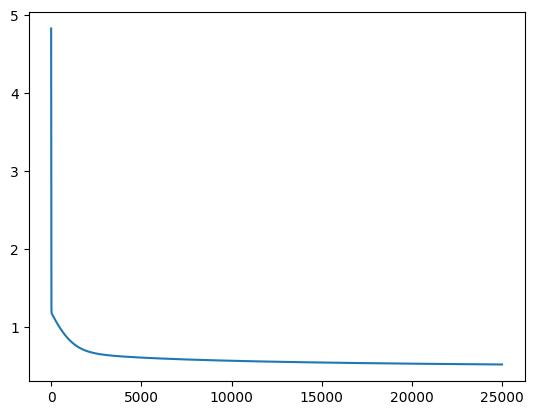

In [16]:
iterations=25000
alpha=.001
Final_pred=main_model(X_train_flat,X_test_flat,Y_train_flat,iterations,alpha)

w=Final_pred["w"]
print("Final w:"+str(w))
b=Final_pred["b"]
print("Final b:"+str(b))

Y_pred_train=Final_pred["Y_pred_train"]
Y_pred_test=Final_pred["Y_pred_test"]

#Training accuracy
accuracy = np.mean(Y_pred_train == Y_train_flat)*100
print("training accuracy"+str(accuracy))

print("test predictions"+str(Y_pred_test))

To convert the prediction values to excel

In [17]:
id=raw_testfile['PassengerId']
#print(id.shape)
Y_pred_test=Final_pred["Y_pred_test"]
#print(Y_pred_test.shape)
pred=Y_pred_test.reshape(-1).astype(int)
#print(pred.shape)
sub_file=pd.DataFrame({'PassengerId':id,'Survived':pred})
csv_filepath='C:/AAKASH/MS NOTES/kaggle/TITANIC/submission_file.csv'

sub_file.to_csv(csv_filepath,index=False)